# Multimodal House Price Prediction – Preprocessing & Geo-EDA

This notebook covers:
- Data cleaning
- Feature engineering
- Geospatial exploratory analysis
The output of this notebook is a clean, model-ready tabular dataset.


In [1]:
from google.colab import files

uploaded = files.upload()


Saving train(1).xlsx to train(1).xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [3]:
df=pd.read_excel(r'train(1).xlsx')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
# # \We begin by loading the raw housing dataset.
# #

## Data Inspection

Before cleaning and feature engineering, we inspect the dataset
to understand its structure, data types, and basic statistics.



In [6]:
df.shape
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning

This step removes non-informative columns, fixes data types, and eliminates invalid records.


In [7]:
df["date"] = pd.to_datetime(
    df["date"],
    format="%Y%m%dT%H%M%S"
)
# this will convert the date columns into correct format



In [8]:
df = df[df["sqft_living"] > 0]
df = df[df["sqft_lot"] > 0]
df = df[df["bedrooms"] > 0]

df = df[df["bathrooms"] > 0]
# # this will remove the invalid data

## Target Transformation

House prices are right-skewed. We apply a log transformation to stabilize variance.


In [9]:

df["price_log"] = np.log1p(df["price"])


Exploratory Data Analysis (EDA) – Real Estate Price Regression

<Figure size 800x500 with 0 Axes>

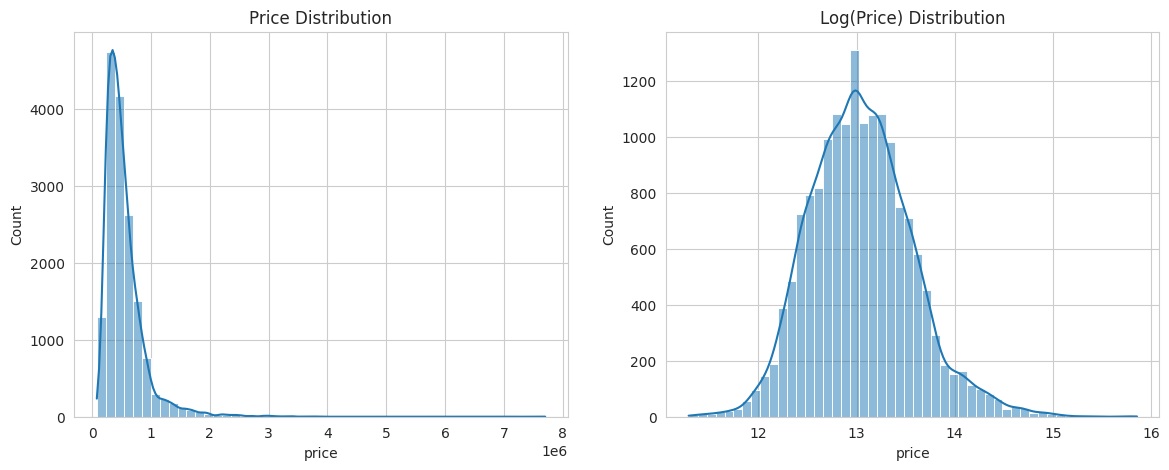

In [10]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df['price'], bins=50, kde=True, ax=axs[0])
axs[0].set_title("Price Distribution")

sns.histplot(np.log1p(df['price']), bins=50, kde=True, ax=axs[1])
axs[1].set_title("Log(Price) Distribution")

plt.show()


In [11]:
# Price is heavily right-skewed. Log-transformation normalizes the distribution and stabilizes variance.
# Decision: Model log(price) instead of raw price.

## Relationship Between Waterfront Status, Living Area, and Price


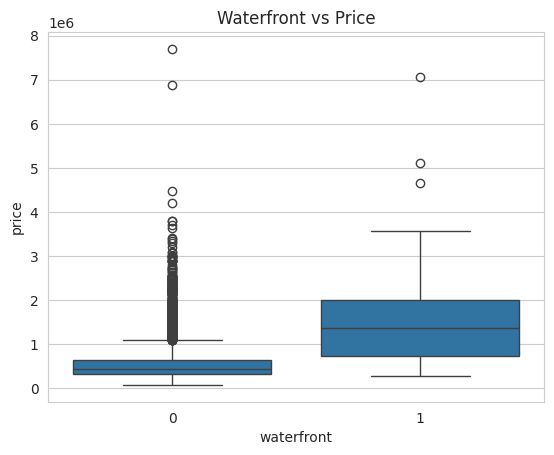

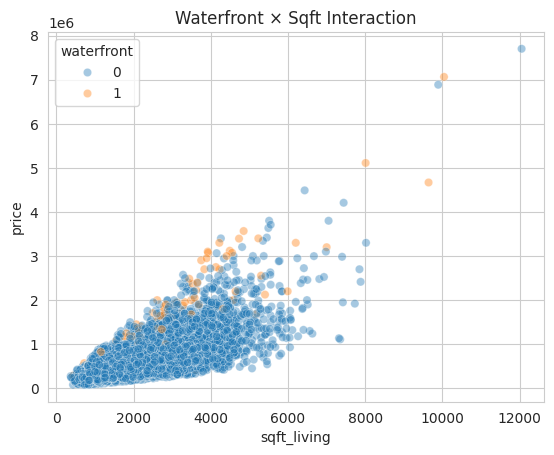

In [12]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Waterfront vs Price")
plt.show()
sns.scatterplot(
    x='sqft_living', y='price',
    hue='waterfront',
    data=df, alpha=0.4
)
plt.title("Waterfront × Sqft Interaction")
plt.show()


In [13]:
# Waterfront acts as a multiplier, not an additive feature.

## Feature Engineering

We engineer structural, temporal, and spatial features to improve predictive performance.


In [14]:
# Extract sale year
df['sale_year'] = df['date'].dt.year
# Effective construction year (renovation > built)
df['effective_year'] =df['yr_built']
df.loc[df['yr_renovated'] > 0, 'effective_year'] = df['yr_renovated']


# House age
df['house_age'] = df['sale_year'] - df['effective_year']
df.loc[df['house_age'] < 0, 'house_age'] = 0



In [15]:
# Living to lot ratio
df["living_to_lot_ratio"] = df["sqft_living"] / df["sqft_lot"]

In [16]:
# Zipcode as categorical
df["zipcode"] = df["zipcode"].astype(str)

In [17]:
# Latitude–Longitude interaction
df["lat_long_interaction"] = df["lat"] * df["long"]

### Feature Correlation Analysis

This heatmap highlights relationships between numerical features and the target variable.
It helps identify strong predictors, multicollinearity, and validates engineered features
before model training.


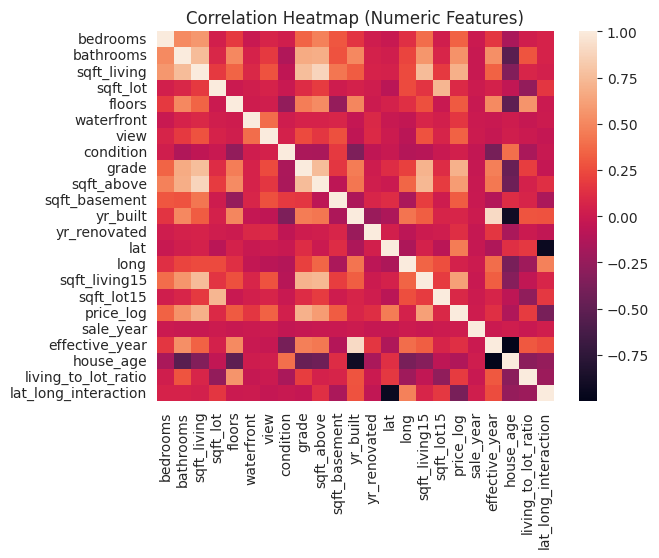

In [18]:
import seaborn as sns
numeric_df=df.select_dtypes("number").drop(columns=["id","price"],errors="ignore")
corr=numeric_df.corr()
plt.figure()
sns.heatmap(corr)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

## Geospatial Analysis

This section explores spatial patterns in property locations and pricing
to understand geographic influence on house prices.


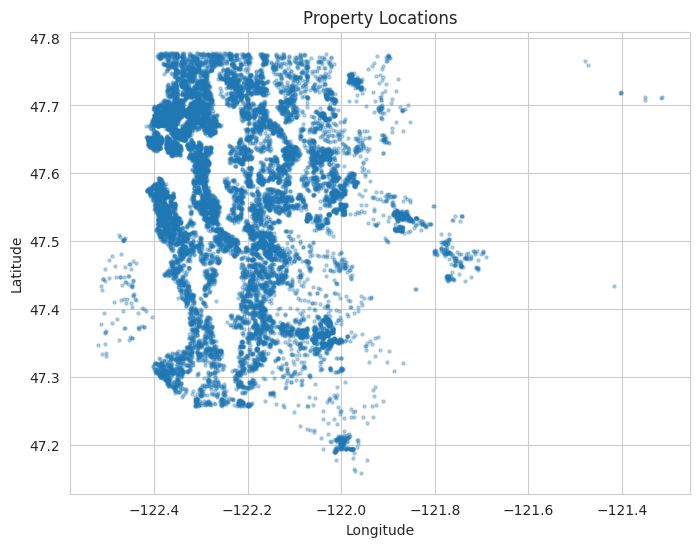

In [19]:
# Property Locations Map
plt.figure(figsize=(8, 6))
plt.scatter(df["long"], df["lat"], alpha=0.3, s=5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Locations")
plt.show()


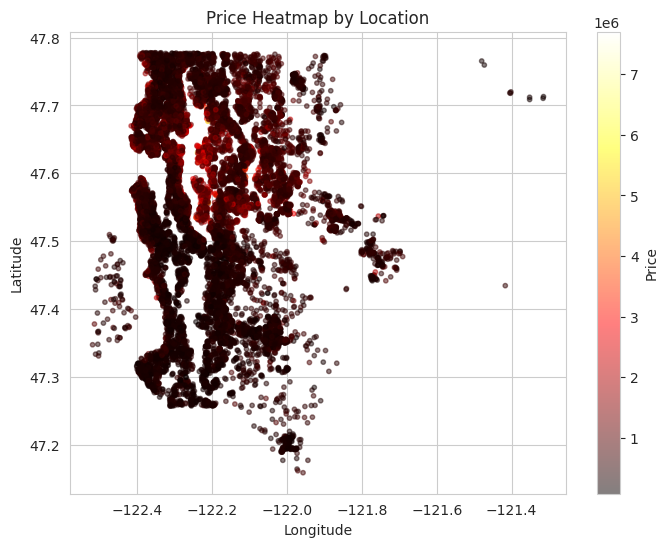

In [20]:
# Price Heatmap
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df["long"], df["lat"],
    c=df["price"],
    cmap="hot",
    alpha=0.5,
    s=10
)
plt.colorbar(sc, label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Price Heatmap by Location")
plt.show()

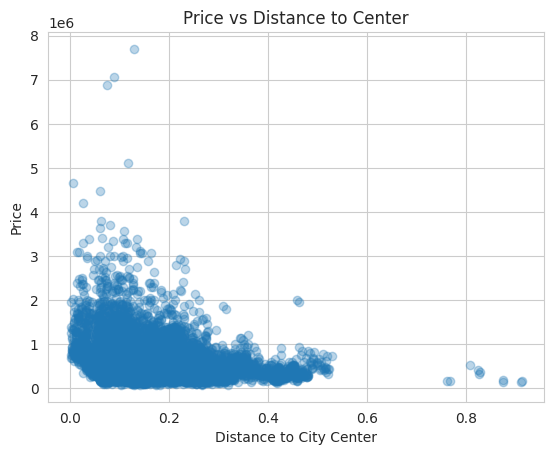

In [21]:
# Distance to City Center
city_lat = df["lat"].mean()
city_long = df["long"].mean()
df["dist_to_center"] = np.sqrt(
    (df["lat"] - city_lat)**2 +
    (df["long"] - city_long)**2
)
plt.scatter(df["dist_to_center"], df["price"], alpha=0.3)
plt.xlabel("Distance to City Center")
plt.ylabel("Price")
plt.title("Price vs Distance to Center")
plt.show()

In [22]:
coords = df[["lat", "long"]]

kmeans = KMeans(n_clusters=5, random_state=42)
df["geo_cluster"] = kmeans.fit_predict(coords)
df.groupby("geo_cluster")["price"].mean()

,price
geo_cluster,
0,656460.835280
1,504617.171593
2,355917.991095
3,647774.209763
4,293486.430007


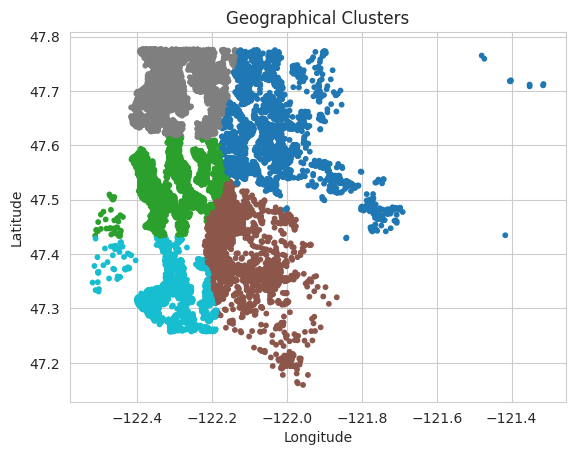

In [23]:
plt.scatter(df["long"], df["lat"], c=df["geo_cluster"], cmap="tab10", s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Clusters")
plt.show()

In [24]:
df.to_csv("processed.csv", index=False)

from google.colab import files
files.download("processed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary

This notebook prepares clean, enriched tabular data and extracts spatial insights
that inform satellite image selection for multimodal house price prediction.
